## 1. Word counts with bag-of-words
### 1.1. Theory
#### Bag-of-words
`Bag of words` is a very simple and basic method to **finding topics in a `text`**. 

- For bag of words, you need to first create tokens using `tokenization`, and
- Then count up all the `tokens` you have. 

The theory is that the more frequent a `word` or `token` is, the more central or important it might be to the text. 

`Bag of words` can be a great way to determine the **significant `words`** in a `text` **based on the number of times they are used**.

In [1]:
string = "The cat is in the box. The cat likes the box. The box is over the cat."

#### Bag-of-words example

    string = "The cat is in the box. The cat likes the box. The box is over the cat."
- Here we see an example series of sentences, mainly about a `cat` and a `box`. 
- If we just us a simple bag of words model with tokenization like we learned in chapter one and `remove the punctuation`, we can see the example result. `Box`, `cat`, `The` and `the` are some of the **most important words** because they are the `most frequent`. 
- Notice that the `word THE` appears twice in the `bag of words`, once with `uppercase` and once `lowercase`. 
- If we added a **preprocessing step** to handle this issue, we could **lowercase all of the words in the text so each word is counted only once**.

**Bag of words (stripped punctuation).**
>- `"The"`, `"box"`, `"cat"` : 3
>- `"is"`: 2
>- `"in"`: 1

**Implement-Python**

In [2]:
from nltk.tokenize import word_tokenize
from collections import Counter

counter = Counter(word_tokenize(string))
counter

Counter({'The': 3,
         'cat': 3,
         'is': 2,
         'in': 1,
         'the': 3,
         'box': 3,
         '.': 3,
         'likes': 1,
         'over': 1})

`Counter objects` also have a method called `most_common`, which takes an integer argument, such as 2 and would then return the top 2 tokens in terms of frequency. 

The return object is a series of tuples inside a list. 

For each tuple, the first element holds the token and the second element represents the frequency.

In [3]:
counter.most_common(5)

[('The', 3), ('cat', 3), ('the', 3), ('box', 3), ('.', 3)]

**Note:** other than ordering by token frequency, the `most_common method` does not sort the tokens it returns or tell us there are more tokens with that same frequency.

### 1.2. PRACTICES
#### Exercise 1.2.1. Bag-of-words picker
It's time for a quick check on your understanding of bag-of-words. Which of the below options, with basic `nltk tokenization`, map the `bag-of-words` for the following text?

In [4]:
your_text = "The cat is in the box. The cat box."

#### Your options.
>- A. `('the', 3), ('box.', 2), ('cat', 2), ('is', 1)`
>- B. `('The', 3), ('box', 2), ('cat', 2), ('is', 1), ('in', 1), ('.', 1)`
>- C. `('the', 3), ('cat box', 1), ('cat', 1), ('box', 1), ('is', 1), ('in', 1)`
>- D. `('The', 2), ('box', 2), ('.', 2), ('cat', 2), ('is', 1), ('in', 1), ('the', 1)`

#### SOLUTION.
By counting the `word` in `your_text`; this is easy to see that **D** is the right-option. Indeed,

In [5]:
counter = Counter(word_tokenize(your_text))
print(counter.most_common())

[('The', 2), ('cat', 2), ('box', 2), ('.', 2), ('is', 1), ('in', 1), ('the', 1)]


#### Exercise 1.2.2. Building a Counter with bag-of-words
In this exercise, you'll build your first (in this course) bag-of-words counter using a Wikipedia article, which has been pre-loaded as article. Try doing the bag-of-words without looking at the full article text, and guessing what the topic is!

In [6]:
article_title = 'Debugging'
article = '\'\'\'Debugging\'\'\' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  \n\nNumerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.\n\nOrigin\nA computer log entry from the Mark&nbsp;II, with a moth taped to the page\n\nThe terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operation, whereupon she remarked that they were "debugging" the system. However the term "bug" in the meaning of technical error dates back at least to 1878 and Thomas Edison (see software bug for a full discussion), and "debugging" seems to have been used as a term in aeronautics before entering the world of computers. Indeed, in an interview Grace Hopper remarked that she was not coining the term{{Citation needed|date=July 2015}}. The moth fit the already existing terminology, so it was saved.  A letter from J. Robert Oppenheimer (director of the WWII atomic bomb "Manhattan" project at Los Alamos, NM) used the term in a letter to Dr. Ernest Lawrence at UC Berkeley, dated October 27, 1944,http://bancroft.berkeley.edu/Exhibits/physics/images/bigscience25.jpg regarding the recruitment of additional technical staff.\n\nThe Oxford English Dictionary entry for "debug" quotes the term "debugging" used in reference to airplane engine testing in a 1945 article in the Journal of the Royal Aeronautical Society. An article in "Airforce" (June 1945 p.&nbsp;50) also refers to debugging, this time of aircraft cameras.  Hopper\'s computer bug|bug was found on September 9, 1947. The term was not adopted by computer programmers until the early 1950s.\nThe seminal article by GillS. Gill, [http://www.jstor.org/stable/98663 The Diagnosis of Mistakes in Programmes on the EDSAC], Proceedings of the Royal Society of London. Series A, Mathematical and Physical Sciences, Vol. 206, No. 1087 (May 22, 1951), pp. 538-554 in 1951 is the earliest in-depth discussion of programming errors, but it does not use the term "bug" or "debugging".\nIn the Association for Computing Machinery|ACM\'s digital library, the term "debugging" is first used in three papers from 1952 ACM National Meetings.Robert V. D. Campbell, [http://portal.acm.org/citation.cfm?id=609784.609786 Evolution of automatic computation], Proceedings of the 1952 ACM national meeting (Pittsburgh), p 29-32, 1952.Alex Orden, [http://portal.acm.org/citation.cfm?id=609784.609793 Solution of systems of linear inequalities on a digital computer], Proceedings of the 1952 ACM national meeting (Pittsburgh), p. 91-95, 1952.Howard B. Demuth, John B. Jackson, Edmund Klein, N. Metropolis, Walter Orvedahl, James H. Richardson, [http://portal.acm.org/citation.cfm?id=800259.808982 MANIAC], Proceedings of the 1952 ACM national meeting (Toronto), p. 13-16 Two of the three use the term in quotation marks.\nBy 1963 "debugging" was a common enough term to be mentioned in passing without explanation on page 1 of the Compatible Time-Sharing System|CTSS manual.[http://www.bitsavers.org/pdf/mit/ctss/CTSS_ProgrammersGuide.pdf The Compatible Time-Sharing System], M.I.T. Press, 1963\n\nKidwell\'s article \'\'Stalking the Elusive Computer Bug\'\'Peggy Aldrich Kidwell, [http://ieeexplore.ieee.org/xpl/freeabs_all.jsp?tp=&arnumber=728224&isnumber=15706 Stalking the Elusive Computer Bug], IEEE Annals of the History of Computing, 1998. discusses the etymology of "bug" and "debug" in greater detail.\n\nScope\nAs software and electronic systems have become generally more complex, the various common debugging techniques have expanded with more methods to detect anomalies, assess impact, and schedule software patches or full updates to a system. The words "anomaly" and "discrepancy" can be used, as being more neutral terms, to avoid the words "error" and "defect" or "bug" where there might be an implication that all so-called \'\'errors\'\', \'\'defects\'\' or \'\'bugs\'\' must be fixed (at all costs). Instead, an impact assessment can be made to determine if changes to remove an \'\'anomaly\'\' (or \'\'discrepancy\'\') would be cost-effective for the system, or perhaps a scheduled new release might render the change(s) unnecessary. Not all issues are life-critical or mission-critical in a system. Also, it is important to avoid the situation where a change might be more upsetting to users, long-term, than living with the known problem(s) (where the "cure would be worse than the disease"). Basing decisions of the acceptability of some anomalies can avoid a culture of a "zero-defects" mandate, where people might be tempted to deny the existence of problems so that the result would appear as zero \'\'defects\'\'. Considering the collateral issues, such as the cost-versus-benefit impact assessment, then broader debugging techniques will expand to determine the frequency of anomalies (how often the same "bugs" occur) to help assess their impact to the overall system.\n\nTools\nDebugging on video game consoles is usually done with special hardware such as this Xbox (console)|Xbox debug unit intended for developers.\n\nDebugging ranges in complexity from fixing simple errors to performing lengthy and tiresome tasks of data collection, analysis, and scheduling updates.  The debugging skill of the programmer can be a major factor in the ability to debug a problem, but the difficulty of software debugging varies greatly with the complexity of the system, and also depends, to some extent, on the programming language(s) used and the available tools, such as \'\'debuggers\'\'. Debuggers are software tools which enable the programmer to monitor the execution (computers)|execution of a program, stop it, restart it, set breakpoints, and change values in memory. The term \'\'debugger\'\' can also refer to the person who is doing the debugging.\n\nGenerally, high-level programming languages, such as Java (programming language)|Java, make debugging easier, because they have features such as exception handling that make real sources of erratic behaviour easier to spot. In programming languages such as C (programming language)|C or assembly language|assembly, bugs may cause silent problems such as memory corruption, and it is often difficult to see where the initial problem happened. In those cases, memory debugging|memory debugger tools may be needed.\n\nIn certain situations, general purpose software tools that are language specific in nature can be very useful.  These take the form of \'\'List of tools for static code analysis|static code analysis tools\'\'.  These tools look for a very specific set of known problems, some common and some rare, within the source code.  All such issues detected by these tools would rarely be picked up by a compiler or interpreter, thus they are not syntax checkers, but more semantic checkers.  Some tools claim to be able to detect 300+ unique problems. Both commercial and free tools exist in various languages.  These tools can be extremely useful when checking very large source trees, where it is impractical to do code walkthroughs.  A typical example of a problem detected would be a variable dereference that occurs \'\'before\'\' the variable is assigned a value.  Another example would be to perform strong type checking when the language does not require such.  Thus, they are better at locating likely errors, versus actual errors.  As a result, these tools have a reputation of false positives.  The old Unix \'\'Lint programming tool|lint\'\' program is an early example.\n\nFor debugging electronic hardware (e.g., computer hardware) as well as low-level software (e.g., BIOSes, device drivers) and firmware, instruments such as oscilloscopes, logic analyzers or in-circuit emulator|in-circuit emulators (ICEs) are often used, alone or in combination.  An ICE may perform many of the typical software debugger\'s tasks on low-level software and firmware.\n\nDebugging process \nNormally the first step in debugging is to attempt to reproduce the problem. This can be a non-trivial task, for example as with Parallel computing|parallel processes or some unusual software bugs. Also, specific user environment and usage history can make it difficult to reproduce the problem.\n\nAfter the bug is reproduced, the input of the program may need to be simplified to make it easier to debug. For example, a bug in a compiler can make it Crash (computing)|crash when parsing some large source file. However, after simplification of the test case, only few lines from the original source file can be sufficient to reproduce the same crash. Such simplification can be made manually, using a Divide and conquer algorithm|divide-and-conquer approach. The programmer will try to remove some parts of original test case and check if the problem still exists. When debugging the problem in a Graphical user interface|GUI, the programmer can try to skip some user interaction from the original problem description and check if remaining actions are sufficient for bugs to appear.\n\nAfter the test case is sufficiently simplified, a programmer can use a debugger tool to examine program states (values of variables, plus the call stack) and track down the origin of the problem(s). Alternatively, Tracing (software)|tracing can be used. In simple cases, tracing is just a few print statements, which output the values of variables at certain points of program execution.{{citation needed|date=February 2016}}\n\n Techniques \n \'\'Interactive debugging\'\'\n \'\'{{visible anchor|Print debugging}}\'\' (or tracing) is the act of watching (live or recorded) trace statements, or print statements, that indicate the flow of execution of a process. This is sometimes called \'\'{{visible anchor|printf debugging}}\'\', due to the use of the printf function in C. This kind of debugging was turned on by the command TRON in the original versions of the novice-oriented BASIC programming language. TRON stood for, "Trace On." TRON caused the line numbers of each BASIC command line to print as the program ran.\n \'\'Remote debugging\'\' is the process of debugging a program running on a system different from the debugger. To start remote debugging, a debugger connects to a remote system over a network. The debugger can then control the execution of the program on the remote system and retrieve information about its state.\n \'\'Post-mortem debugging\'\' is debugging of the program after it has already Crash (computing)|crashed. Related techniques often include various tracing techniques (for example,[http://www.drdobbs.com/tools/185300443 Postmortem Debugging, Stephen Wormuller, Dr. Dobbs Journal, 2006]) and/or analysis of memory dump (or core dump) of the crashed process. The dump of the process could be obtained automatically by the system (for example, when process has terminated due to an unhandled exception), or by a programmer-inserted instruction, or manually by the interactive user.\n \'\'"Wolf fence" algorithm:\'\' Edward Gauss described this simple but very useful and now famous algorithm in a 1982 article for communications of the ACM as follows: "There\'s one wolf in Alaska; how do you find it? First build a fence down the middle of the state, wait for the wolf to howl, determine which side of the fence it is on. Repeat process on that side only, until you get to the point where you can see the wolf."<ref name="communications of the ACM">{{cite journal | title="Pracniques: The "Wolf Fence" Algorithm for Debugging", | author=E. J. Gauss | year=1982}} This is implemented e.g. in the Git (software)|Git version control system as the command \'\'git bisect\'\', which uses the above algorithm to determine which Commit (data management)|commit introduced a particular bug.\n \'\'Delta Debugging\'\'{{snd}} a technique of automating test case simplification.Andreas Zeller: <cite>Why Programs Fail: A Guide to Systematic Debugging</cite>, Morgan Kaufmann, 2005. ISBN 1-55860-866-4{{rp|p.123}}<!-- for redirect from \'Saff Squeeze\' -->\n \'\'Saff Squeeze\'\'{{snd}} a technique of isolating failure within the test using progressive inlining of parts of the failing test.[http://www.threeriversinstitute.org/HitEmHighHitEmLow.html Kent Beck, Hit \'em High, Hit \'em Low: Regression Testing and the Saff Squeeze]\n\nDebugging for embedded systems\nIn contrast to the general purpose computer software design environment, a primary characteristic of embedded environments is the sheer number of different platforms available to the developers (CPU architectures, vendors, operating systems and their variants). Embedded systems are, by definition, not general-purpose designs: they are typically developed for a single task (or small range of tasks), and the platform is chosen specifically to optimize that application. Not only does this fact make life tough for embedded system developers, it also makes debugging and testing of these systems harder as well, since different debugging tools are needed in different platforms.\n\nto identify and fix bugs in the system (e.g. logical or synchronization problems in the code, or a design error in the hardware);\nto collect information about the operating states of the system that may then be used to analyze the system: to find ways to boost its performance or to optimize other important characteristics (e.g. energy consumption, reliability, real-time response etc.).\n\nAnti-debugging\nAnti-debugging is "the implementation of one or more techniques within computer code that hinders attempts at reverse engineering or debugging a target process".<ref name="veracode-antidebugging">{{cite web |url=http://www.veracode.com/blog/2008/12/anti-debugging-series-part-i/ |title=Anti-Debugging Series - Part I |last=Shields |first=Tyler |date=2008-12-02 |work=Veracode |accessdate=2009-03-17}} It is actively used by recognized publishers in copy protection|copy-protection schemas, but is also used by malware to complicate its detection and elimination.<ref name="soft-prot">[http://people.seas.harvard.edu/~mgagnon/software_protection_through_anti_debugging.pdf Software Protection through Anti-Debugging Michael N Gagnon, Stephen Taylor, Anup Ghosh] Techniques used in anti-debugging include:\nAPI-based: check for the existence of a debugger using system information\nException-based: check to see if exceptions are interfered with\nProcess and thread blocks: check whether process and thread blocks have been manipulated\nModified code: check for code modifications made by a debugger handling software breakpoints\nHardware- and register-based: check for hardware breakpoints and CPU registers\nTiming and latency: check the time taken for the execution of instructions\nDetecting and penalizing debugger<ref name="soft-prot" /><!-- reference does not exist -->\n\nAn early example of anti-debugging existed in early versions of Microsoft Word which, if a debugger was detected, produced a message that said: "The tree of evil bears bitter fruit. Now trashing program disk.", after which it caused the floppy disk drive to emit alarming noises with the intent of scaring the user away from attempting it again.<ref name="SecurityEngineeringRA">{{cite book | url=http://www.cl.cam.ac.uk/~rja14/book.html | author=Ross J. Anderson | title=Security Engineering | isbn = 0-471-38922-6 | page=684 }}<ref name="toastytech">{{cite web | url=http://toastytech.com/guis/word1153.html | title=Microsoft Word for DOS 1.15}}\n'

If you'd like to peek at the title at the end, we've included it as `article_title`. Note that this article text has had very little preprocessing from the raw Wikipedia database entry.

#### SOLUTION.

In [7]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 68), ('to', 63), ('a', 60), ('in', 44), ('and', 41), ('debugging', 40)]


## 2. Simple text preprocessing
### 2.1. Theory.
####  Why preprocess?
`Text processing` helps make for better input data when performing machine learning or other `statistical methods`. 

For example, in the last few exercises you have applied small bits of preprocessing (like tokenization) to **create a `bag of words`**. You also noticed that applying simple techniques like lowercasing all of the tokens, can lead to slightly better results for a `bag-of-words model`. 

Preprocessing steps like tokenization or **lowercasing words are commonly** used in `NLP`.

Other common techniques are things like **`lemmatization`** or **`stemming`**, where you shorten the words to their root stems, or techniques like **removing `stop words`**, which are common words in a language that don't carry a lot of meaning -- such as and or the, or **removing `punctuation` or unwanted tokens**. 

Of course, each model and process will have different results -- so it's good to try a few different approaches to preprocessing and see which works best for your task and goal.

In [8]:
import nltk.stem

#### Example.
- We have here some example input and output text we might expect from preprocessing. First we have a simple two sentence string about pets. Then we have some example output tokens we want. You can see that the text has been tokenized and that everything is lowercase. We also notice that stopwords have been removed and the plural nouns have been made singular.
- We can perform text preprocessing using many of the tools we already know and have learned. In this code, we are using the same text as from our previous video, a few sentences about a cat with a box. We can use list comprehensions to tokenize the sentences which we first make lowercase using the string lower method. 
- The string `is_alpha` method will return **True** if the string has **only alphabetical characters**. We use the `is_alpha method` along with an if statement iterating over our tokenized result to only return only alphabetic strings (this will effectively strip tokens with numbers or punctuation). 


In [9]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  \
                Can you find 4 sentences?  Or perhaps, all 19 words?"
tokens = [w for w in word_tokenize(my_string.lower()) if w.isalpha()]
print(tokens)

['let', 'write', 'regex', 'wo', 'that', 'be', 'fun', 'i', 'sure', 'think', 'so', 'can', 'you', 'find', 'sentences', 'or', 'perhaps', 'all', 'words']


- To read out the process in both code and English we say we take each token from the `word_tokenize` output of the lowercase text if it contains only alphabetical characters. In the next line, we use another list comprehension to remove words that are in the stopwords list. This stopwords list for english comes built in with the NLTK library. 

In [10]:
from nltk.corpus import stopwords
no_stopw = [s for s in tokens if s not in stopwords.words('english')]
print(no_stopw)

['let', 'write', 'regex', 'wo', 'fun', 'sure', 'think', 'find', 'sentences', 'perhaps', 'words']


- Finally, we can create a counter and check the two most common words, which are now cat and box (unlike the and box which were the two tokens returned in our first result). Preprocessing has already improved our bag of words and made it more useful by removing the stopwords and non-alphabetic words.

In [11]:
Counter(no_stopw).most_common(2)

[('let', 1), ('write', 1)]

## 2.2. PRACTICES
#### Exercise 2.2.1. Text preprocessing steps
Which of the following are useful text preprocessing steps?
>- A. Stems, spelling corrections, lowercase.
>- B. Lemmatization, lowercasing, removing unwanted tokens.
>- C. Removing stop words, leaving in capital words.
>- D. Strip stop words, word endings and digits

#### SOLUTION.
>- A. Incorrect! Missing `stopwords`
>- B. Correct!!
>- C. Wrong! Leaving all capitals is not good method.
>- D. Incorrect! Missing `lowercase`

#### Exercise 2.2.2. Text preprocessing practice
Now, it's your turn to apply the techniques you've learned to help clean up text for better `NLP` results. You'll need to remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on your cleaned text.

You start with the same tokens you created in the last exercise: `lower_tokens`. You also have the Counter class imported.
#### SOLUTION.

In [12]:
english_stops = stopwords.words('english')
print(len(english_stops))
print(english_stops[:10])
print(english_stops[-10:])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


In [13]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 40), ('system', 25), ('software', 16), ('bug', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('used', 12)]


## 3. Introduction to gensim
### 3.1. Theory
#### Definition
**`Gensim`** is a popular `open-source NLP` library. 

It uses top academic models to perform complex tasks like building document or `word vectors`, `corpora` and `performing topic identification` and `document comparisons`.
####  What is a word vector?
You might be wondering what a word or document vector is? 

Here are some examples here in visual form. A `word embedding` or `vector` is trained from a `larger corpus` and is a `multi-dimensional representation` of a `word` or `document`.

- You can think of it as a multi-dimensional array normally with `sparse features` (lots of zeros and some ones). With these vectors, we can then see **relationships** among the `words or documents` based on **how near or far** they are and also what `similar comparisons` we find. 

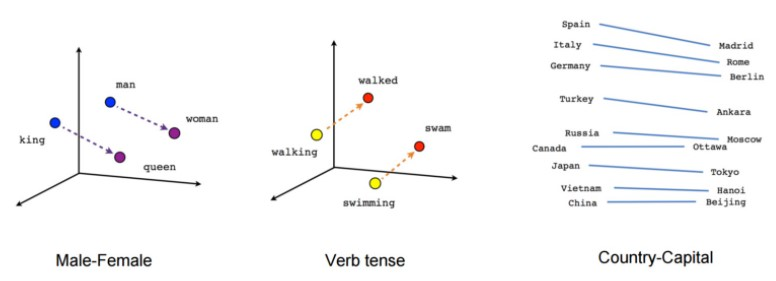

In [14]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

- For example, in this graphic we can see that the vector operation king minus queen is approximately equal to man minus woman. Or that `Spain` is to `Madrid` as `Italy` is to `Rome`. The deep learning algorithm used to create word vectors has been able to distill this meaning based on how those words are used throughout the text.

#### Gensim example
The graphic we have here is an example of `LDA visualization`. `LDA` stands for **latent dirichlet allocation**, and it is a statistical model we can apply to text using Gensim for topic analysis and modelling. 

This graph is just a portion of a blog post written in 2015 using Gensim to analyze US presidential addresses. 

The article is really neat and you can find the link here.

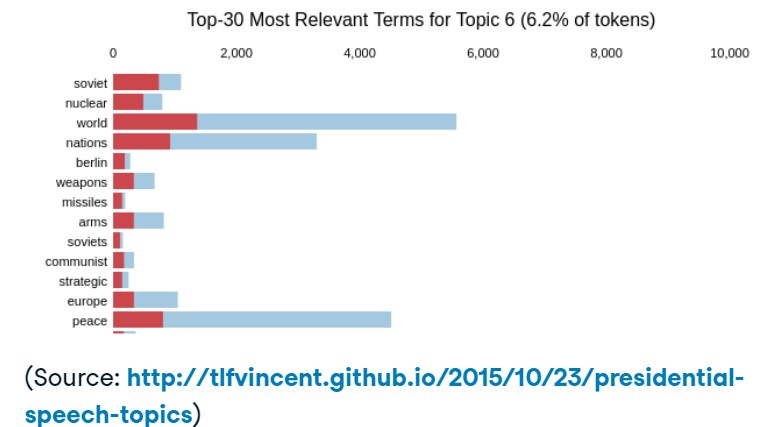

In [15]:
## Hình minh họa Image(fig1, height, width)

#### Creating a gensim dictionary
Gensim allows you to build corpora and dictionaries using simple classes and functions. 

A corpus (or if plural, corpora) is a set of texts used to help perform natural language processing tasks. 

Here, our documents are a list of strings that look like movie reviews about space or sci-fi films. 
- First we need to do some basic preprocessing.

In [16]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

my_documents = ['The movies was about the spaceship and aliens',
                'I really liked the movie',
                'Awesome action scenes, but boring characters',
                'The movies was awful! I hate alien films',
                'Space is cool! I liked the movie',
                'More space films, please!'
               ]

- For brevity, we will only `tokenize` and `lowercase`. For better results, we would want to apply more of the preprocessing we have learned in this chapter, such as removing punctuation and stop words. 

In [17]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]

- Then we can pass the `tokenized documents` to the `Gensim Dictionary` class. This will create a mapping with an id for each token. This is the beginning of our corpus. 

In [18]:
dictionary = Dictionary(tokenized_docs)

We now can represent whole documents using just a list of their token ids and how often those tokens appear in each document. We can take a look at the tokens and their ids by looking at the `token2id` attribute, which is a dictionary of all of our tokens and their respective ids in our new dictionary.

In [19]:
print(dictionary.token2id)

{'about': 0, 'aliens': 1, 'and': 2, 'movies': 3, 'spaceship': 4, 'the': 5, 'was': 6, 'i': 7, 'liked': 8, 'movie': 9, 'really': 10, ',': 11, 'action': 12, 'awesome': 13, 'boring': 14, 'but': 15, 'characters': 16, 'scenes': 17, '!': 18, 'alien': 19, 'awful': 20, 'films': 21, 'hate': 22, 'cool': 23, 'is': 24, 'space': 25, 'more': 26, 'please': 27}


Using the `dictionary` we built in the preceding-command, we can then create a `Gensim corpus`. This is a bit different than a `normal corpus` -- which is just a collection of documents. Gensim uses a simple `bag-of-words` model which transforms each document into a bag of words using the token ids and the frequency of each token in the document. 

In [20]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)], [(5, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(3, 1), (5, 1), (6, 1), (7, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(5, 1), (7, 1), (8, 1), (9, 1), (18, 1), (23, 1), (24, 1), (25, 1)], [(11, 1), (18, 1), (21, 1), (25, 1), (26, 1), (27, 1)]]


Here, we can see that the Gensim corpus is a list of lists, each list item representing one document. Each document a series of tuples, the first item representing the `tokenid` from the dictionary and the second item representing the token frequency in the document. In only a few lines, we have a `new bag-of-words model` and corpus thanks to Gensim. 

And unlike our previous `Counter-based` bag of words, this Gensim model can be easily saved, updated and reused thanks to the extra tools we have available in Gensim. Our dictionary can also be updated with new texts and extract only words that meet particular thresholds. We are building a more advanced and `feature-rich bag-of-words model` which can then be used for future exercises.

### 3.2. PRACTICES
#### Exercise 3.2.1. What are word vectors?
What are word vectors and how do they help with NLP?
#### Answers.
Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give us insight into relationships between words in a corpus.

#### Exercise 3.2.2. Creating and querying a corpus with gensim
It's time to apply the methods you learned in the previous video to create your first gensim dictionary and `corpus`!

You'll use these data structures to investigate word trends and potential interesting topics in your document set. To get started, we have imported a few additional messy articles from `Wikipedia`, which were preprocessed by lowercasing all words, tokenizing them, and removing `stop words` and `punctuation`. These were then stored in a list of document tokens called `articles`. You'll need to do some light preprocessing and then generate the `gensim` dictionary and corpus.
#### SOLUTION.

In [21]:
## Print the first 10 elements in the first 2 lines of articles
print(articles[k][:10] for k in range(2))

# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

<generator object <genexpr> at 0x7f6043fd9c50>
computer
[(0, 88), (23, 11), (24, 2), (39, 1), (41, 2), (55, 22), (56, 1), (57, 1), (58, 1), (59, 3)]


#### Exercise 3.2.3. Gensim bag-of-words
Now, you'll use your new gensim corpus and dictionary to see the most common terms per document and across all documents. You can use your dictionary to look up the terms. Take a guess at what the topics are and feel free to explore more documents in the `IPython` Shell!

You have access to the dictionary and corpus objects you created in the previous exercise, as well as the Python defaultdict and itertools to help with the creation of intermediate data structures for analysis.

defaultdict allows us to initialize a dictionary that will assign a default value to non-existent keys. By supplying the argument int, we are able to ensure that any non-existent keys are automatically assigned a default value of 0. This makes it ideal for storing the counts of words in this exercise.

`itertools.chain.from_iterable()` allows us to iterate through a set of sequences as if they were one continuous sequence. Using this function, we can easily iterate through our corpus object (which is a list of lists).

The fifth document from corpus is stored in the variable `doc`, which has been sorted in descending order.
#### SOLUTION.
**Step 1.**

In [22]:
import itertools
from collections import defaultdict

# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

engineering 91
'' 88
reverse 71
software 51
cite 26


**Step 2.**

In [23]:
# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

'' 1042
computer 594
software 450
`` 345
cite 322


## 4. Tf-idf with gensim
### 4.1. Theory
#### What is tf-idf?
**`Tf-idf`** stands for `term-frequncy - inverse document frequency`. 

It is a commonly used natural language processing model that helps you determine the most important words in each document in the `corpus`. The idea behind `tf-idf` is that each corpus might have more shared words than just `stopwords`. These common words are like stopwords and should be removed or at least down-weighted in importance. 

For example, if I am an astronomer, sky might be used often but is not important, so I want to downweight that word. `TF-Idf` does precisely that. It will take texts that share common language and ensure the most common words across the entire corpus don't show up as `keywords`. 

`Tf-idf` helps keep the document-specific frequent words weighted high and the common words across the entire corpus weighted low.
#### Tf-idf formula
The equation to calculate the weights can be outlined like so: The weight of `token` $i$ in `document` $j$ is calculated by taking the term `frequency` $\text{tf}_{i,j}$ (or how many times the `token` $i$ appears in the `document` $j$) multiplied by the log of the `total number of documents` $N$ divided by the `number of documents that contain the same term` $\text{df}_i$. 

Let's unpack this a bit. 

$$ w_{i, j} = \text{tf}_{i,j} \cdot \log \left( \frac{N}{\text{df}_i} \right) $$

- First, the `weight` $w_{i,j}$ will be low if the term doesnt appear often in the document because the tf variable will then be low. 
- However, the weight will also be a low if the logarithm is close to zero, meaning the internal equation is low. Here we can see if the total number of documents divded by the number of documents that have the term is close to one, then our logarithm will be close to zero. So words that occur across many or all documents will have a very low tf-idf weight. 
- On the contrary, if the **word only occurs in a few documents**, that logarithm will return a **higher number**.

####  Tf-idf with gensim
You can build a `Tfidf model` using `Gensim` and the corpus you developed previously. 

Taking a look at the corpus we used in the last theory, around movie reviews, we can use the `Bag of Words` corpus to translate it into a `TF-idf model` by simply passing it in initialization. 

We can then reference each document by using it like a dictionary key with our new `tfidf model`. For the `second document: corpus[1]` in our corpora, we see the token weights along with the token ids. 

In [24]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)
print(tfidf[corpus[1]])

[(24, 0.011399045514486917), (55, 0.04080071484788309), (56, 0.013683938639912924), (57, 0.010834177261291197), (63, 0.010834177261291197), (67, 0.017171764685312382), (75, 0.03369895338785744), (82, 0.012675174848042372), (94, 0.006337587424021186), (98, 0.01684947669392872), (100, 0.00899317967454002), (112, 0.0421236917348218), (120, 0.00842473834696436), (127, 0.010834177261291197), (128, 0.00899317967454002), (134, 0.021668354522582395), (135, 0.00449658983727001), (141, 0.002849761378621729), (148, 0.0494624882099701), (150, 0.022482949186350052), (154, 0.00842473834696436), (155, 0.0013600238282627697), (161, 0.01798635934908004), (165, 0.00449658983727001), (169, 0.03250253178387359), (170, 0.028005941946603576), (172, 0.08667341809032958), (175, 0.028005941946603576), (176, 0.012675174848042372), (178, 0.028005941946603576), (194, 0.010834177261291197), (198, 0.02527421504089308), (199, 0.006337587424021186), (200, 0.008549284135865188), (208, 0.00899317967454002), (211, 0.006

Notice there are some large differences! Token id 10 has a weight of 0.77 whereas tokens 0 and 1 have weights below 0.18. These weights can help you determine good topics and keywords for a corpus with shared vocabulary.

### 4.2. PRACTICES
#### Exercise 4.2.1. What is tf-idf?
You want to calculate the `tf-idf weight` for the word `"computer"`, which appears $5$ times in a `document` containing $100$ `words`. 

- Given a corpus containing $200$ `documents`,
- with $20$ `documents` mentioning the word `"computer"`, 

tf-idf can be calculated by multiplying term frequency with inverse document frequency?
#### Answers

We have:
>- `tf_{i, j} = 5 / 100; N = 200` and `df_{i} = 20`
>- Hence, 
$$ w_{i, j} = \text{tf}_{i,j} \cdot \log \left( \frac{N}{\text{df}_i} \right) = \dfrac{5}{100} \times \log \left( \frac{200}{20} \right) $$

#### Exercise 4.2.2. Tf-idf with Wikipedia
Now it's your turn to determine new significant terms for your corpus by applying gensim's `tf-idf`. You will again have access to the same corpus and dictionary objects you created in the previous exercises - `dictionary`, `corpus`, and `doc`. 

Will `tf-idf` make for more interesting results on the document level?

`TfidfModel` has been imported for you from `gensim.models.tfidfmodel`.
#### SOLUTION.
**Step 1.**

In [25]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[: 5])

[(24, 0.0022836332291091273), (39, 0.0043409401554717324), (41, 0.008681880310943465), (55, 0.011988285029371418), (56, 0.005482756770026296)]


**Step 2.**

In [26]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

reverse 0.4884961428651127
infringement 0.18674529210288995
engineering 0.16395041814479536
interoperability 0.12449686140192663
reverse-engineered 0.12449686140192663


In [28]:
import cv2